# **Battle of the Neighborhoods - Coursera Final Project**

# **Find the best part of Miami to open a Pizza Shoppe**

# Part 1 - Importing data from Wikipedia and cleaning data for Miami

In [1]:
# import packages 

import pandas as pd
import numpy as np


In [2]:
# scraping the table from wikipedia and creating a dataframe

df_read = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami', match='Neighborhood', flavor='bs4', header=[0])

df = pd.DataFrame(data=df_read[0])

df.head(2)

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190


In [3]:
# rename and drop the columns 

df = df.rename(columns={'Population2010': 'Population'})

df = df.drop(['Demonym', 'Population/Km²', 'Sub-neighborhoods'], axis=1)

df

,Neighborhood,Population,Coordinates
0,Allapattah,54289,25.815-80.224
1,Arts & Entertainment District,11033,25.799-80.190
2,Brickell,31759,25.758-80.193
3,Buena Vista,9058,25.813-80.192
4,Coconut Grove,20076,25.712-80.257
5,Coral Way,35062,25.750-80.283
6,Design District,3573,25.813-80.193
7,Downtown,"71,000 (13,635 CBD only)",25.774-80.193
8,Edgewater,15005,25.802-80.190
9,Flagami,50834,25.762-80.316


In [4]:
# split the coordinates into lat and long

df['Coordinates'] = df['Coordinates'].astype(str)

df[['Latitude','Longitude']] = df.Coordinates.str.split("-",expand=True)

df.drop('Coordinates', axis=1, inplace=True)

df

,Neighborhood,Population,Latitude,Longitude
0,Allapattah,54289,25.815,80.224
1,Arts & Entertainment District,11033,25.799,80.190
2,Brickell,31759,25.758,80.193
3,Buena Vista,9058,25.813,80.192
4,Coconut Grove,20076,25.712,80.257
5,Coral Way,35062,25.750,80.283
6,Design District,3573,25.813,80.193
7,Downtown,"71,000 (13,635 CBD only)",25.774,80.193
8,Edgewater,15005,25.802,80.190
9,Flagami,50834,25.762,80.316


In [5]:
# clean up missing data and misc


df.iloc[7,1]= 71000                                      # clean up str text 

df.iloc[16,1]= 24870                                     # google searched to find these missing populations

df.iloc[21,1]= 228

df.drop([11, 25], inplace=True)

df['Population'] = df['Population'].astype(np.int64)      # cast number types

df['Latitude'] = df['Latitude'].astype(np.float64)

df['Longitude'] = df['Longitude'].astype(np.float64)

df['Longitude'] = df['Longitude'] * -1                    # make longitude negative again

df.reset_index(drop=True , inplace=True)

df

,Neighborhood,Population,Latitude,Longitude
0,Allapattah,54289,25.815,-80.224
1,Arts & Entertainment District,11033,25.799,-80.190
2,Brickell,31759,25.758,-80.193
3,Buena Vista,9058,25.813,-80.192
4,Coconut Grove,20076,25.712,-80.257
5,Coral Way,35062,25.750,-80.283
6,Design District,3573,25.813,-80.193
7,Downtown,71000,25.774,-80.193
8,Edgewater,15005,25.802,-80.190
9,Flagami,50834,25.762,-80.316


# Part 2 - Segmenting the venue data using Foursquare

In [6]:
# import data viz libraries and maps

import matplotlib.cm as cm                                 #for colors etc...
import matplotlib.colors as colors


!conda install -c conda-forge folium=0.5.0 --yes            #conda installer

import folium                                               #for maps

import json
from pandas.io.json import json_normalize

import requests 


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
# function to find the venues in any neighborhood


LIMIT = 100


def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [206]:
# apply the function to miami neighborhoods

miami_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [229]:
# analyze each neighborhood

# one hot encoding
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
miami_onehot['Neighborhood'] = miami_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]

miami_onehot.head()


,Yoga Studio,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,...,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
# group rows by neighborhood and mean freq

miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()

miami_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Allapattah,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.00000
1,Arts & Entertainment District,0.047619,0.0,0.000000,0.0,0.00000,0.00000,0.000000,0.047619,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.047619,0.0,0.0,0.00000
2,Brickell,0.000000,0.0,0.035714,0.0,0.00000,0.00000,0.035714,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.017857,0.00000,0.000000,0.0,0.0,0.00000
3,Buena Vista,0.000000,0.0,0.023810,0.0,0.02381,0.02381,0.000000,0.047619,0.047619,...,0.0,0.0,0.0,0.0,0.000000,0.02381,0.000000,0.0,0.0,0.02381
4,Coconut Grove,0.000000,0.0,0.333333,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.00000


In [231]:
# function to sort venues in descending order


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [232]:
#each neighborhoods top ten venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = miami_grouped['Neighborhood']

for ind in np.arange(miami_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Convenience Store,Boxing Gym,Lounge,Department Store,Dog Run,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant,Donut Shop
1,Arts & Entertainment District,Restaurant,Ice Cream Shop,Yoga Studio,Spa,Coffee Shop,Cupcake Shop,Moving Target,Pizza Place,Salon / Barbershop,Sandwich Place
2,Brickell,Hotel,Italian Restaurant,Japanese Restaurant,Juice Bar,Restaurant,Bar,Bank,Salon / Barbershop,Café,Sandwich Place
3,Buena Vista,Café,Nightclub,Jewelry Store,Art Gallery,Art Museum,Italian Restaurant,Boutique,Clothing Store,Furniture / Home Store,Coffee Shop
4,Coconut Grove,American Restaurant,Park,Boat or Ferry,Women's Store,Dog Run,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant


# Part 3 - Clustering the similar neighborhoods using KMeans

In [233]:
#cluster the neighborhoods

from sklearn.cluster import KMeans

# set number of clusters
kclusters = 6

miami_cluster = miami_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(miami_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [234]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

miami_merged = df


# merge miami_grouped with miami_data to add latitude/longitude for each neighborhood
miami_merged = miami_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='right')

miami_merged['Cluster Labels'] = miami_merged['Cluster Labels'].astype(int)


miami_merged.head() # check out the Cluster Labels column!

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,54289,25.815,-80.224,5,Convenience Store,Boxing Gym,Lounge,Department Store,Dog Run,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant,Donut Shop
1,Arts & Entertainment District,11033,25.799,-80.190,0,Restaurant,Ice Cream Shop,Yoga Studio,Spa,Coffee Shop,Cupcake Shop,Moving Target,Pizza Place,Salon / Barbershop,Sandwich Place
2,Brickell,31759,25.758,-80.193,0,Hotel,Italian Restaurant,Japanese Restaurant,Juice Bar,Restaurant,Bar,Bank,Salon / Barbershop,Café,Sandwich Place
3,Buena Vista,9058,25.813,-80.192,0,Café,Nightclub,Jewelry Store,Art Gallery,Art Museum,Italian Restaurant,Boutique,Clothing Store,Furniture / Home Store,Coffee Shop
4,Coconut Grove,20076,25.712,-80.257,3,American Restaurant,Park,Boat or Ferry,Women's Store,Dog Run,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant


In [235]:
# create map


latitude = 25.761681
longitude = -80.191788



map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster -1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 1

### This is the choice neighborhood cluster.  Lots of hotels and other restaurants. Even some other popular pizza places (let's avoid these neighborhoods).

In [236]:
miami_merged.loc[miami_merged['Cluster Labels'] == 0, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arts & Entertainment District,Restaurant,Ice Cream Shop,Yoga Studio,Spa,Coffee Shop,Cupcake Shop,Moving Target,Pizza Place,Salon / Barbershop,Sandwich Place
2,Brickell,Hotel,Italian Restaurant,Japanese Restaurant,Juice Bar,Restaurant,Bar,Bank,Salon / Barbershop,Café,Sandwich Place
3,Buena Vista,Café,Nightclub,Jewelry Store,Art Gallery,Art Museum,Italian Restaurant,Boutique,Clothing Store,Furniture / Home Store,Coffee Shop
5,Coral Way,Liquor Store,Seafood Restaurant,Café,Historic Site,Pharmacy,Mobile Phone Shop,Golf Course,Burger Joint,Dive Bar,Eastern European Restaurant
6,Design District,Café,Nightclub,Clothing Store,Furniture / Home Store,Boutique,Jewelry Store,Art Museum,Art Gallery,Coffee Shop,Italian Restaurant
7,Downtown,Italian Restaurant,Hotel,Peruvian Restaurant,Sandwich Place,Coffee Shop,Cocktail Bar,Café,Pharmacy,Lounge,Brazilian Restaurant
8,Edgewater,Sandwich Place,Restaurant,Art Gallery,Breakfast Spot,Pizza Place,Coffee Shop,Cuban Restaurant,Peruvian Restaurant,Gym / Fitness Center,Gym
9,Flagami,Seafood Restaurant,Pizza Place,Department Store,Spanish Restaurant,Bakery,Fast Food Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store
10,Grapeland Heights,Hotel,Bakery,Gym / Fitness Center,Gym,Lounge,Golf Course,Bus Station,Bar,Restaurant,Empanada Restaurant
12,Little Haiti,Hotel,Shopping Mall,Pub,Pizza Place,Pilates Studio,Pharmacy,New American Restaurant,Liquor Store,Italian Restaurant,Ice Cream Shop


# Cluster 2

### Not too much going on in this neighborhood.  Do people want to eat pizza at a beach?

In [237]:
miami_merged.loc[miami_merged['Cluster Labels'] == 1, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Virginia Key,Beach,Women's Store,Flea Market,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant,Donut Shop,Dog Run,Dive Bar


# Cluster 3

### Not too much going on in this neighborhood. 

In [238]:
miami_merged.loc[miami_merged['Cluster Labels'] == 2, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Liberty City,Southern / Soul Food Restaurant,Bar,Park,Women's Store,Dive Bar,Event Space,Empanada Restaurant,Eastern European Restaurant,Donut Shop,Dog Run


# Cluster 4

### Not too much going on in this neighborhood. Do people want to eat pizza in a park or on a ferry? 

In [239]:
miami_merged.loc[miami_merged['Cluster Labels'] == 3, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Coconut Grove,American Restaurant,Park,Boat or Ferry,Women's Store,Dog Run,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant
20,Venetian Islands,Lounge,Park,Boat or Ferry,Business Service,Women's Store,Dog Run,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant


# Cluster 5

### Not too much going on in this neighborhood. 

In [240]:
miami_merged.loc[miami_merged['Cluster Labels'] == 4, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Overtown,Southern / Soul Food Restaurant,Wings Joint,Athletics & Sports,Dog Run,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant,Donut Shop,Dive Bar


# Cluster 6

### Not too much going on in this neighborhood.

In [241]:
miami_merged.loc[miami_merged['Cluster Labels'] == 5, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Convenience Store,Boxing Gym,Lounge,Department Store,Dog Run,Fast Food Restaurant,Event Space,Empanada Restaurant,Eastern European Restaurant,Donut Shop


# Find the neighborhoods with the most pizza places and compare to populations

In [242]:
# count the total number of pizza places per neighborhood

miami_pizza = miami_onehot[['Neighborhood','Pizza Place']]

miami_pizza = miami_pizza.groupby(['Neighborhood']).count()

miami_pizza = miami_pizza.reset_index()

miami_pizza = miami_pizza.join(df['Population'])

miami_pizza = miami_pizza.sort_values(by=['Pizza Place'])

miami_pizza.head()

,Neighborhood,Pizza Place,Population
21,Virginia Key,2,14
11,Liberty City,3,19725
4,Coconut Grove,3,20076
20,Venetian Islands,4,228
16,Overtown,4,6736


In [243]:
# add cluster labels to pizza shoppe data frame and drop all cluster except cluster 0


miami_pizza = pd.concat([ miami_pizza , miami_merged['Cluster Labels']], axis=1 )

miami_pizza = miami_pizza[miami_pizza['Cluster Labels'] == 0]


miami_pizza

,Neighborhood,Pizza Place,Population,Cluster Labels
1,Arts & Entertainment District,21,11033,0
2,Brickell,56,31759,0
3,Buena Vista,42,9058,0
5,Coral Way,10,35062,0
6,Design District,41,3573,0
7,Downtown,68,71000,0
8,Edgewater,49,15005,0
9,Flagami,7,50834,0
10,Grapeland Heights,9,14004,0
12,Little Haiti,25,29760,0


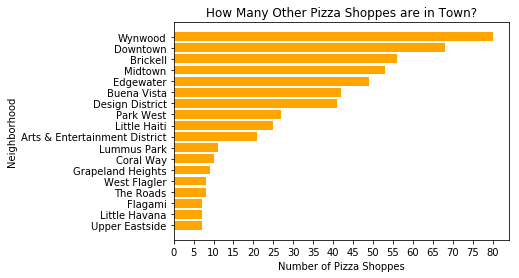

In [244]:
# visualize how many pizza shoppes are in town

import matplotlib.pyplot as plt


miami_pizza = miami_pizza.sort_values(by='Pizza Place')


y = miami_pizza['Neighborhood']
width = miami_pizza['Pizza Place']

plt.xticks(np.arange(0, 85, step=5))
plt.xlabel('Number of Pizza Shoppes')
plt.ylabel('Neighborhood')
plt.title('How Many Other Pizza Shoppes are in Town?')
plt.barh(y, width, height=0.8, left=None, align='center', color = 'orange') 


plt.show()


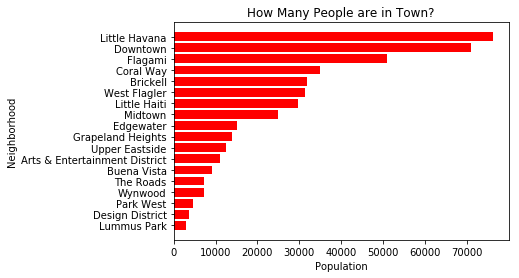

In [245]:
# visualize the populations

import matplotlib.pyplot as plt


miami_pizza = miami_pizza.sort_values(by='Population')


y = miami_pizza['Neighborhood']
width = miami_pizza['Population']

plt.xticks(np.arange(0, 80000, step=10000))
plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('How Many People are in Town?')
plt.barh(y, width, height=0.8, left=None, align='center', color = 'red') 


plt.show()

# Top Three Neighborhoods

In [246]:
# narrow the decision down to neighborhood with a big population and small number of pizza shoppes

miami_pizza = miami_pizza[miami_pizza['Population'] > 15000]
miami_pizza = miami_pizza[miami_pizza['Pizza Place'] < 10]

miami_pizza


,Neighborhood,Pizza Place,Population,Cluster Labels
22,West Flagler,8,31407,0
9,Flagami,7,50834,0
13,Little Havana,7,76163,0


# Top Two Neighborhoods

In [247]:
# Look for other popular pizza shoppes in each neighborhood 'competition'

miami_comp = miami_merged.loc[[22, 9, 13]]

miami_comp


,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,West Flagler,31407,25.775,-80.243,0,Cuban Restaurant,Bakery,Pharmacy,Concert Hall,Comfort Food Restaurant,Rental Service,Gas Station,Latin American Restaurant,Eastern European Restaurant,Donut Shop
9,Flagami,50834,25.762,-80.316,0,Seafood Restaurant,Pizza Place,Department Store,Spanish Restaurant,Bakery,Fast Food Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store
13,Little Havana,76163,25.773,-80.215,0,Latin American Restaurant,Pharmacy,Discount Store,Shoe Store,Mexican Restaurant,Grocery Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop


In [248]:
# Flagami's second most popular venue is already a pizza place so drop Flagami

miami_pizza = miami_pizza.drop([9])

miami_pizza

,Neighborhood,Pizza Place,Population,Cluster Labels
22,West Flagler,8,31407,0
13,Little Havana,7,76163,0


# Top Neighborhood ! !

In [250]:
# Ok by comparing the Population and number of Pizza Places in the Neighborhood

miami_pizza = miami_pizza.drop([22])

miami_pizza

,Neighborhood,Pizza Place,Population,Cluster Labels
13,Little Havana,7,76163,0


# Comparing the two, Little Havana is the best place to open a pizza shoppe based on the fact that there is more than double the Population and the same amount of pizza shoppes as West Flagler.

# There is a high Population (76163) and a small number of Pizza Shoppes (7)

# Little Havana it is!